# 1. This part is for electricity consumption analysis.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from scipy.stats import linregress
import time

!pip install pmdarima numpy scipy statsmodels scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 16.2 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# record the time for estimating domestic electricity demand
start_time = time.time()

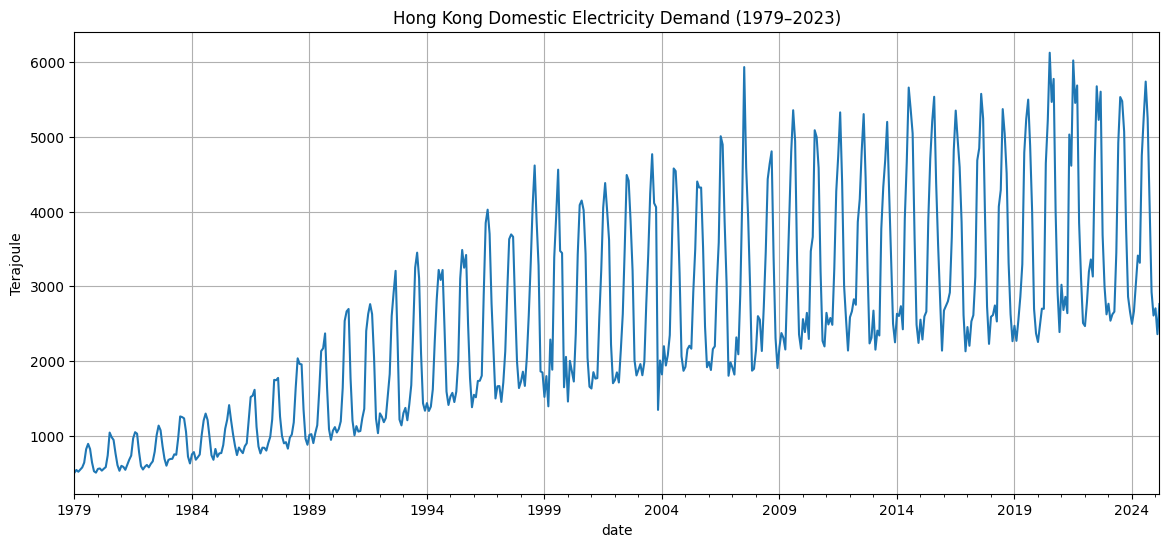

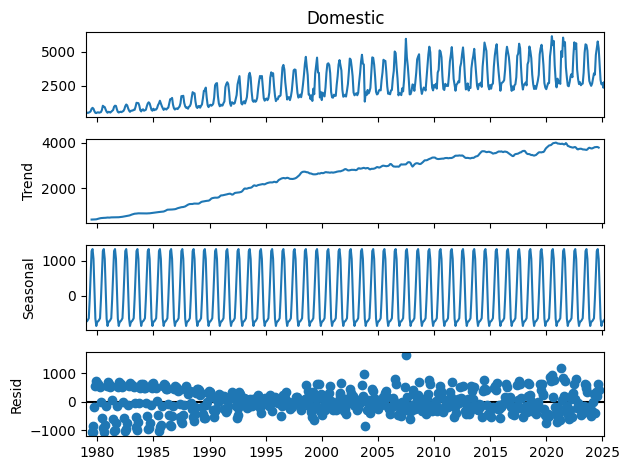

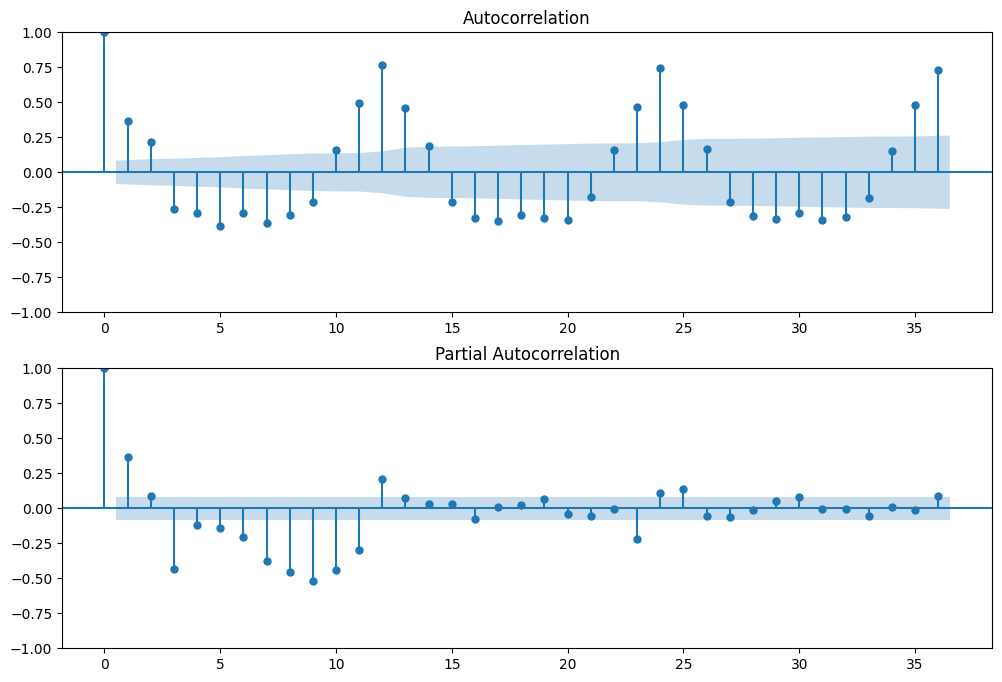

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                           Domestic   No. Observations:                  555
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -3689.337
Date:                            Tue, 20 May 2025   AIC                           7388.673
Time:                                    13:53:37   BIC                           7410.019
Sample:                                01-01-1979   HQIC                          7397.030
                                     - 03-01-2025                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1417      0.038      3.754      0.000       0.068       0.216
ma.L1         -0.9567      0.014   

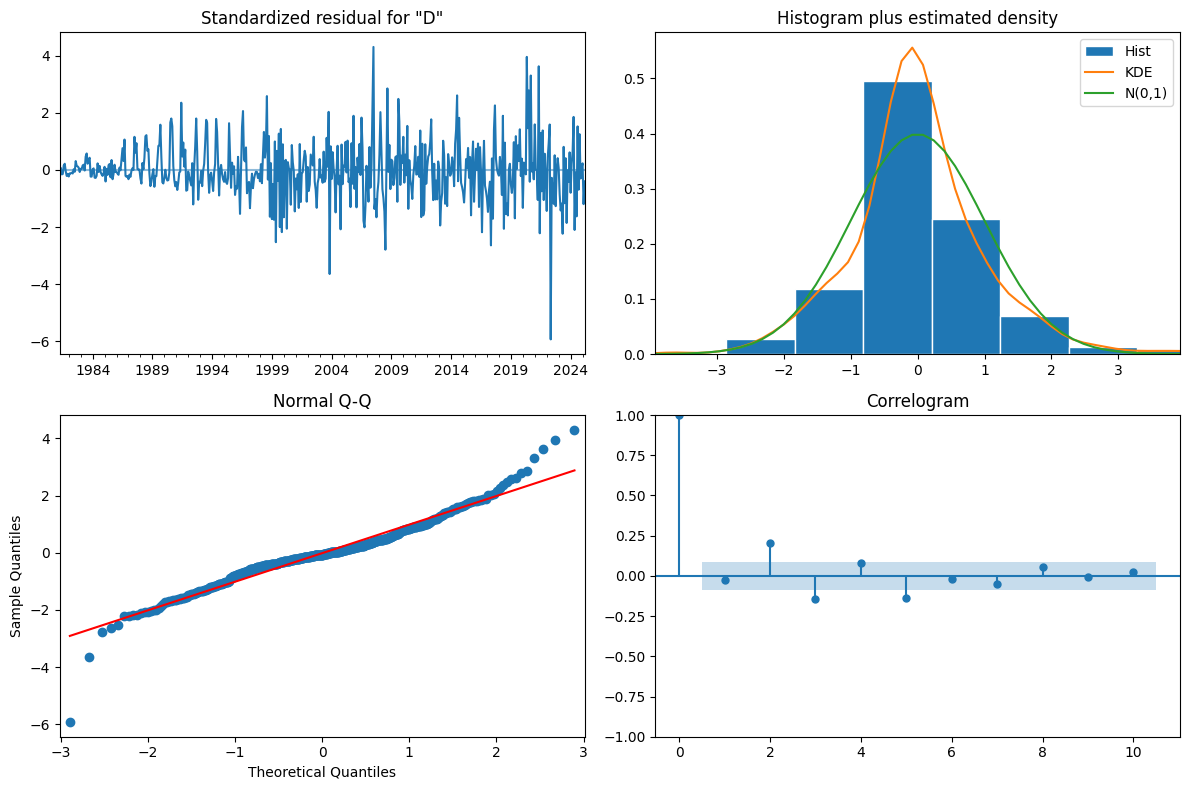

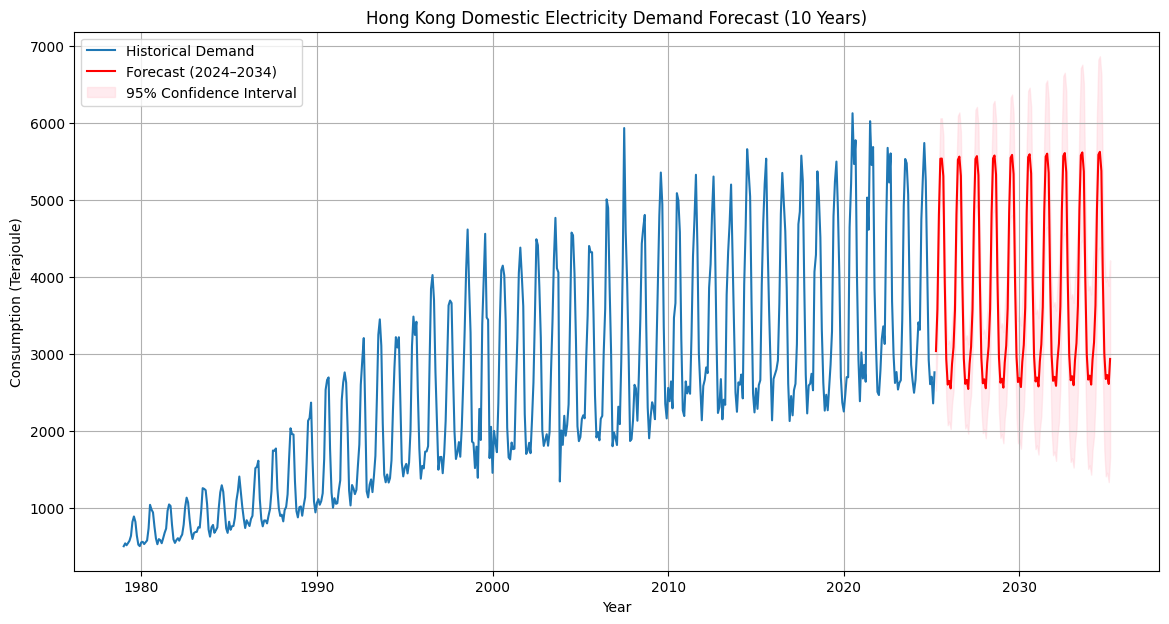

In [ ]:
# Estimation of domestic electricity demand

# Load data
#df = pd.read_csv('/content/drive/My Drive/CVIL4220/Project/electricity_consumption.csv/')
df = pd.read_csv('/content/electricity consumption.csv')
df['date'] = pd.to_datetime(df['Year'].astype(str) + '-' + df['Month'].astype(str))
df.set_index('date', inplace=True)
df.sort_index(inplace=True)

# Extract domestic demand (same as industrial forecast method)
domestic_series = df['Domestic']

# Plot historical domestic demand
plt.figure(figsize=(14, 6))
domestic_series.plot(title='Hong Kong Domestic Electricity Demand (1979–2023)', ylabel='Terajoule', grid=True)
plt.show()

# Seasonal decomposition (check trends & seasonality)
decomposition = seasonal_decompose(domestic_series, model='additive', period=12)
decomposition.plot()
plt.show()

# ACF & PACF plots (to confirm SARIMA parameters)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
plot_acf(domestic_series.diff().dropna(), lags=36, ax=ax1)
plot_pacf(domestic_series.diff().dropna(), lags=36, ax=ax2)
plt.show()

# SARIMA parameters (same as industrial forecast)
order = (1, 1, 1)           # (p, d, q) - Non-seasonal
seasonal_order = (1, 1, 1, 12)  # (P, D, Q, s) - Seasonal (12 months)

# Fit SARIMA model
model = SARIMAX(
    domestic_series,
    order=order,
    seasonal_order=seasonal_order,
    enforce_stationarity=False,
    enforce_invertibility=False
)
results = model.fit(disp=False)
print(results.summary())

# Model diagnostics (residuals, QQ-plot, etc.)
results.plot_diagnostics(figsize=(12, 8))
plt.tight_layout()
plt.show()

# Forecast next 10 years (120 months)
forecast_period = 120
forecast = results.get_forecast(steps=forecast_period)
forecast_values = forecast.predicted_mean
confidence_intervals = forecast.conf_int()

# Generate future dates
last_date = domestic_series.index[-1]
forecast_dates = pd.date_range(
    start=last_date + pd.DateOffset(months=1),
    periods=forecast_period,
    freq='MS'
)

# Plot forecast vs. historical data
plt.figure(figsize=(14, 7))
plt.plot(domestic_series.index, domestic_series, label='Historical Demand')
plt.plot(forecast_dates, forecast_values, color='red', label='Forecast (2024–2034)')
plt.fill_between(
    forecast_dates,
    confidence_intervals.iloc[:, 0],
    confidence_intervals.iloc[:, 1],
    color='pink',
    alpha=0.3,
    label='95% Confidence Interval'
)
plt.title('Hong Kong Domestic Electricity Demand Forecast (10 Years)')
plt.ylabel('Consumption (Terajoule)')
plt.xlabel('Year')
plt.legend()
plt.grid(True)
plt.show()


We want to know how much time consumed for estimation.

In [ ]:
end_time = time.time()
execution_time = end_time - start_time
print(f"Execution time for domestic electricity demand: {execution_time:.4f} seconds")

Execution time for domestic electricity demand: 10.9828 seconds


In [ ]:
# record the time for estimating commercial electricity demand
start_time = time.time()

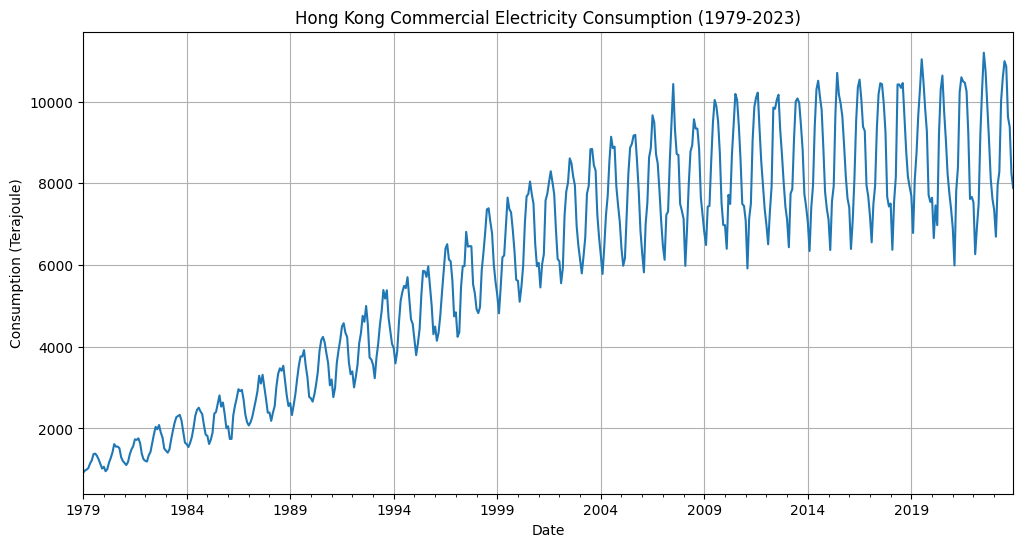

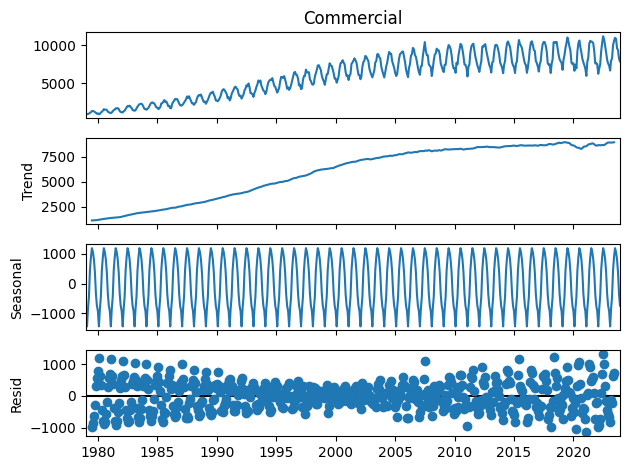

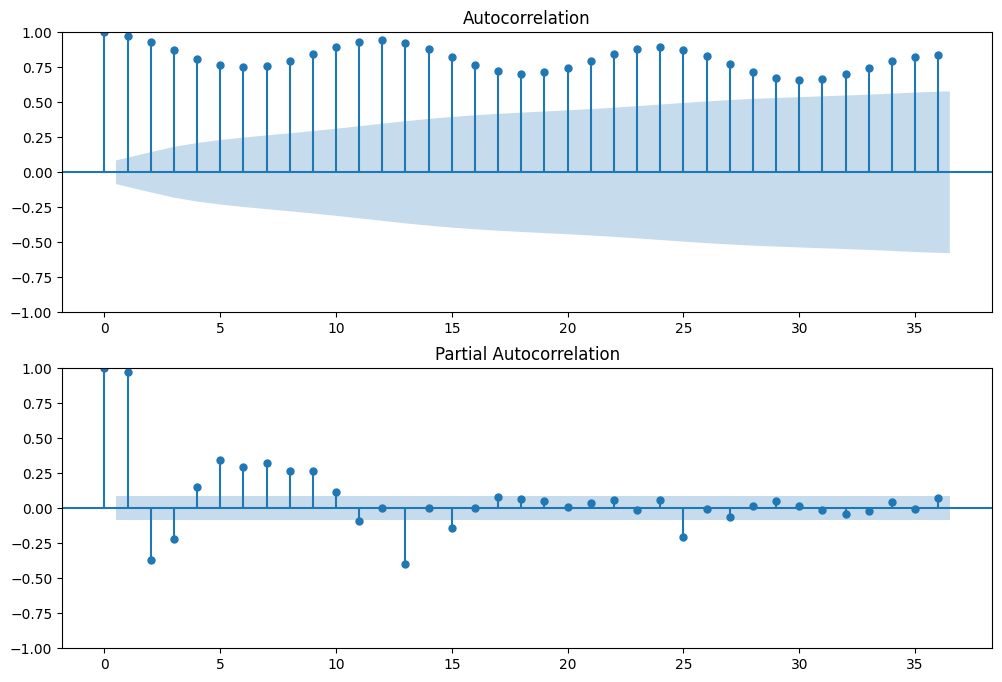

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                         Commercial   No. Observations:                  540
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -3545.717
Date:                            Tue, 20 May 2025   AIC                           7101.434
Time:                                    13:53:47   BIC                           7122.636
Sample:                                01-01-1979   HQIC                          7109.744
                                     - 12-01-2023                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3080      0.040      7.726      0.000       0.230       0.386
ma.L1         -0.9289      0.016   

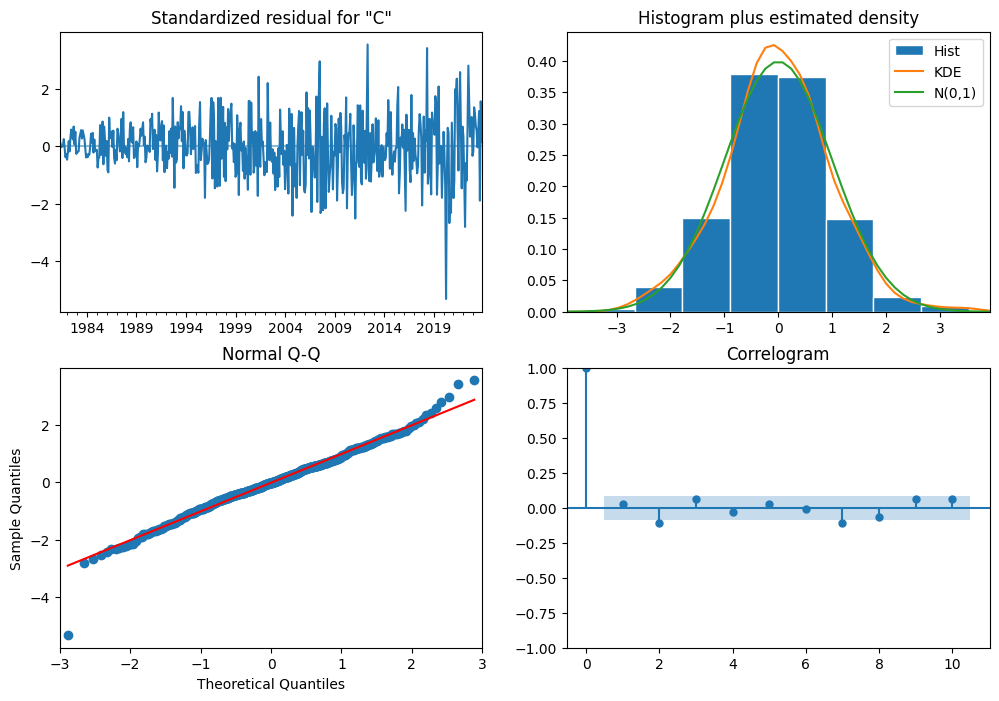

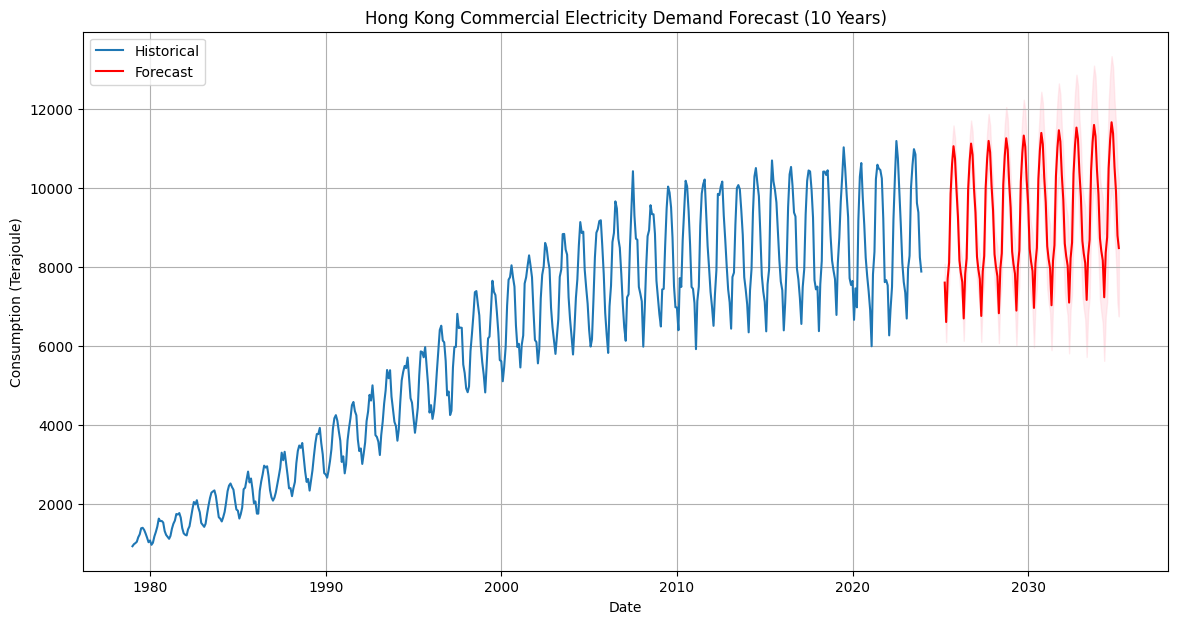

   Year  Month  Commercial_Forecast      Lower_CI      Upper_CI
0  2025      4          7602.996252   7128.320938   8077.671567
1  2025      5          6603.741008   6096.114721   7111.367294
2  2025      6          7703.425289   7188.032393   8218.818186
3  2025      7          8107.922188   7588.910442   8626.933933
4  2025      8          9860.038630   9338.370857  10381.706404
5  2025      9         10612.770336  10088.719178  11136.821495
6  2025     10         11062.434768  10536.087809  11588.781726
7  2025     11         10748.212084  10219.602591  11276.821578
8  2025     12          9973.958940   9443.103675  10504.814206
9  2026      1          9276.537471   8743.448075   9809.626867


In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


# Load and prepare data
df = pd.read_csv('electricity consumption.csv')
df['date'] = pd.to_datetime(df['Year'].astype(str) + '-' + df['Month'].astype(str))
df.set_index('date', inplace=True)
df.sort_index(inplace=True)

# Use data up to 2023 for training (adjust as needed)
train = df[df.index.year <= 2023]['Commercial']
test = df[df.index.year > 2023]['Commercial']  # if you have test data

## Time Series Analysis
# Plot the data
plt.figure(figsize=(12,6))
train.plot()
plt.title('Hong Kong Commercial Electricity Consumption (1979-2023)')
plt.ylabel('Consumption (Terajoule)')
plt.xlabel('Date')
plt.grid(True)
plt.show()

# Seasonal decomposition
result = seasonal_decompose(train, model='additive', period=12)
result.plot()
plt.show()

# ACF and PACF plots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12,8))
plot_acf(train, lags=36, ax=ax1)
plot_pacf(train, lags=36, ax=ax2)
plt.show()

## SARIMA Model - Using same approach as domestic forecast
# Based on analysis, we'll use SARIMA(1,1,1)(1,1,1,12) - these parameters should match what you used for domestic
order = (1, 1, 1)  # (p,d,q) non-seasonal parameters
seasonal_order = (1, 1, 1, 12)  # (P,D,Q,s) seasonal parameters

model = SARIMAX(train,
                order=order,
                seasonal_order=seasonal_order,
                enforce_stationarity=False,
                enforce_invertibility=False)

results = model.fit(disp=False)
print(results.summary())

# Diagnostic plots
results.plot_diagnostics(figsize=(12,8))
plt.show()

## Forecasting
# Forecast next 10 years (120 months)
forecast_steps = 120
forecast = results.get_forecast(steps=forecast_steps)
forecast_mean = forecast.predicted_mean
conf_int = forecast.conf_int()

# Create date range for future predictions
last_date = df.index[-1]
forecast_dates = pd.date_range(start=last_date + pd.DateOffset(months=1), periods=forecast_steps, freq='MS')

# Plot results
plt.figure(figsize=(14,7))
plt.plot(train.index, train, label='Historical')
plt.plot(forecast_dates, forecast_mean, color='red', label='Forecast')
plt.fill_between(forecast_dates,
                 conf_int.iloc[:,0],
                 conf_int.iloc[:,1],
                 color='pink', alpha=0.3)
plt.title('Hong Kong Commercial Electricity Demand Forecast (10 Years)')
plt.ylabel('Consumption (Terajoule)')
plt.xlabel('Date')
plt.legend()
plt.grid(True)
plt.show()

## Output forecast data
forecast_df = pd.DataFrame({
    'Year': forecast_dates.year,
    'Month': forecast_dates.month,
    'Commercial_Forecast': forecast_mean.values,
    'Lower_CI': conf_int.iloc[:,0].values,
    'Upper_CI': conf_int.iloc[:,1].values
})

print(forecast_df.head(10))

In [ ]:
end_time = time.time()
execution_time = end_time - start_time
print(f"Execution time for commercial electricity demand: {execution_time:.4f} seconds")

Execution time for commercial electricity demand: 7.7209 seconds


In [ ]:
# record the time for estimating industrial electricity demand
start_time = time.time()

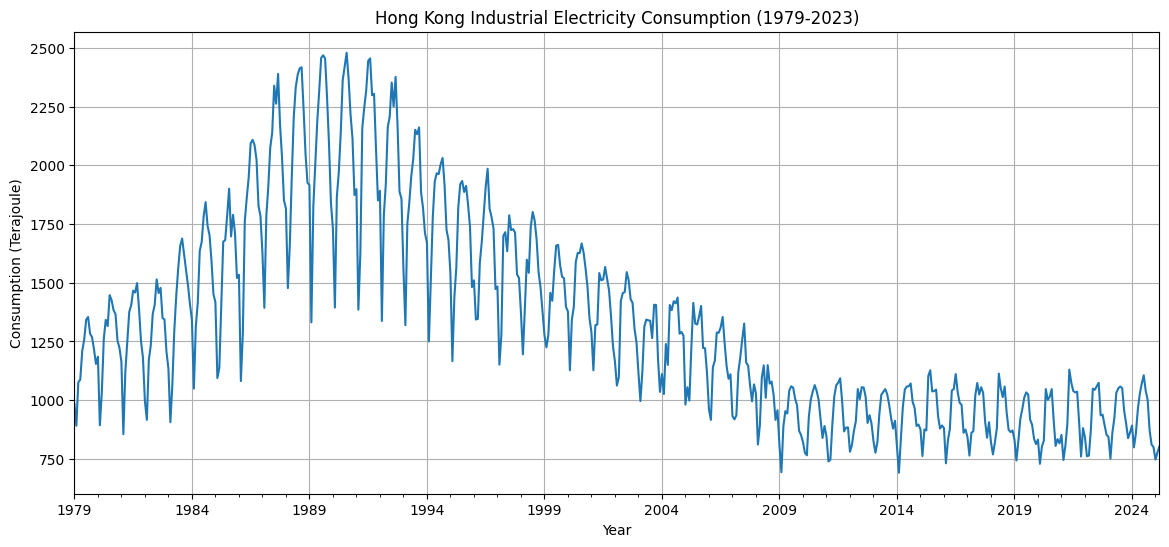

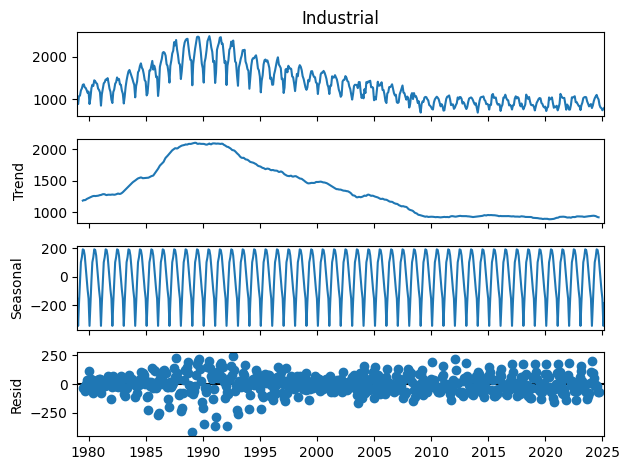

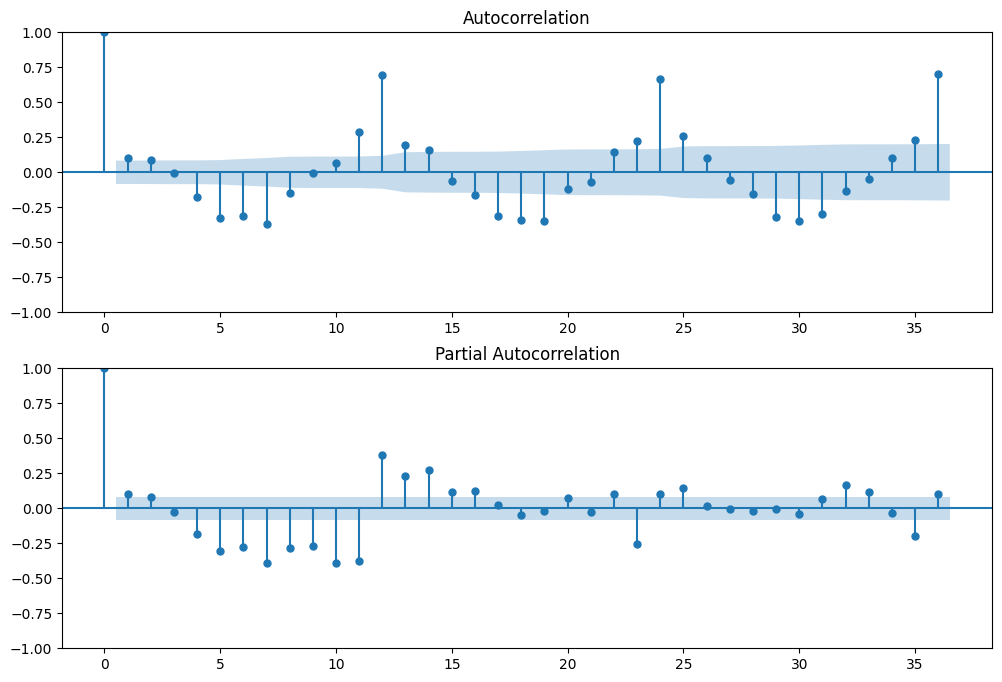

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                         Industrial   No. Observations:                  555
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -3004.434
Date:                            Tue, 20 May 2025   AIC                           6018.868
Time:                                    13:53:55   BIC                           6040.214
Sample:                                01-01-1979   HQIC                          6027.224
                                     - 03-01-2025                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0328      0.055      0.596      0.551      -0.075       0.141
ma.L1         -0.7505      0.036   

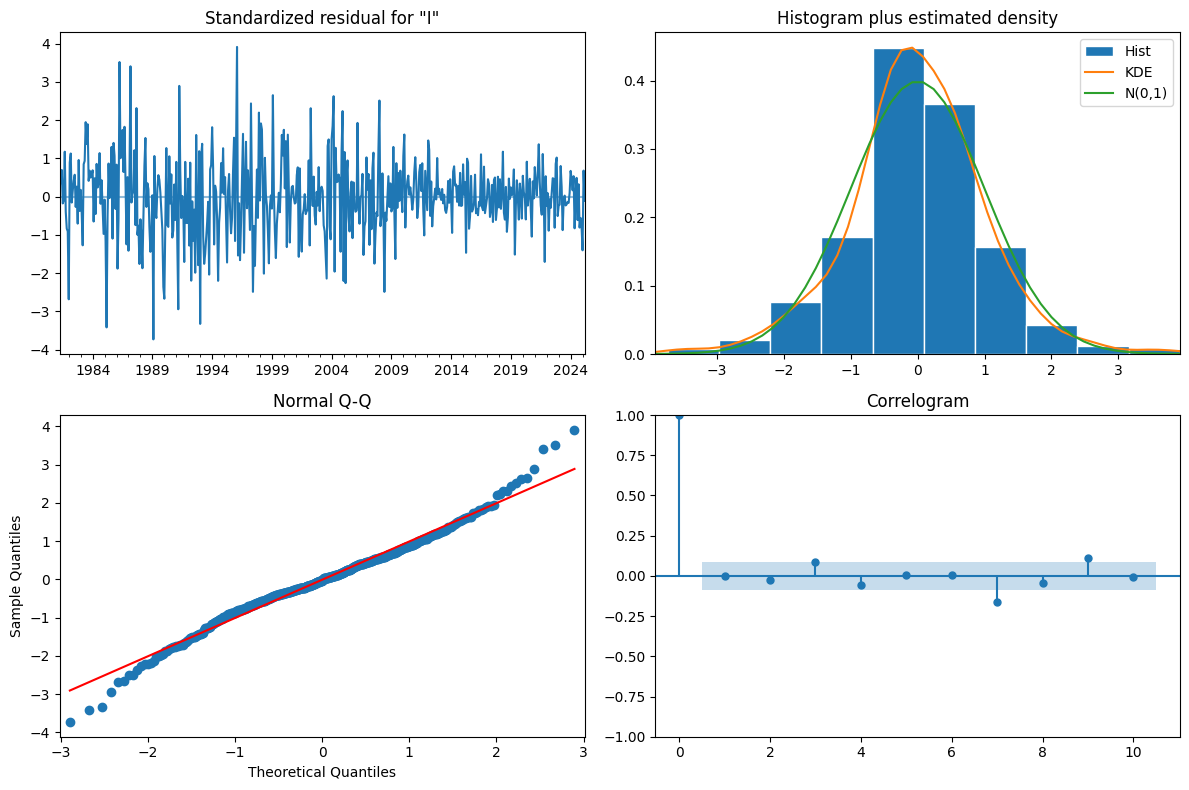

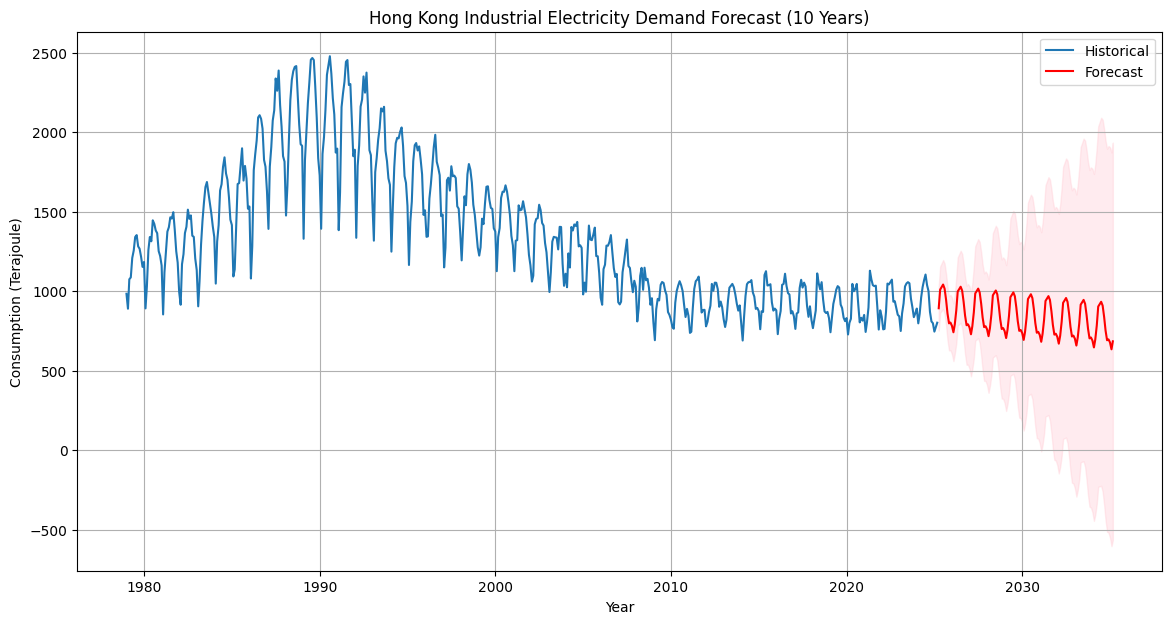

 Year  Month  Industrial_Forecast_Terajoule  Lower_Bound  Upper_Bound
 2025      4                          894.0        754.0       1033.9
 2025      5                         1011.1        865.7       1156.5
 2025      6                         1027.3        877.4       1177.2
 2025      7                         1043.0        888.9       1197.2
 2025      8                         1017.4        859.0       1175.7
 2025      9                          947.4        785.0       1109.8
 2025     10                          859.7        693.4       1026.1
 2025     11                          799.1        628.9        969.3
 2025     12                          803.9        629.9        977.9
 2026      1                          783.4        605.7        961.2
 2026      2                          742.8        561.5        924.2
 2026      3                          792.3        607.4        977.2
 2026      4                          880.1        672.3       1088.0
 2026      5        

In [ ]:
# Load and prepare data
df = pd.read_csv('electricity consumption.csv')
df['date'] = pd.to_datetime(df['Year'].astype(str) + '-' + df['Month'].astype(str))
df.set_index('date', inplace=True)
df.sort_index(inplace=True)

# Use industrial consumption data
industrial_series = df['Industrial']

## Time Series Analysis (Same as Domestic Method)
# Plot historical data
plt.figure(figsize=(14,6))
industrial_series.plot()
plt.title('Hong Kong Industrial Electricity Consumption (1979-2023)')
plt.ylabel('Consumption (Terajoule)')
plt.xlabel('Year')
plt.grid(True)
plt.show()

# Seasonal decomposition - confirm patterns match domestic data
decomposition = seasonal_decompose(industrial_series, model='additive', period=12)
decomposition.plot()
plt.show()

# ACF/PACF analysis - verify same parameters as domestic
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12,8))
plot_acf(industrial_series.diff().dropna(), lags=36, ax=ax1)
plot_pacf(industrial_series.diff().dropna(), lags=36, ax=ax2)
plt.show()

## SARIMA Modeling (Identical to Domestic Approach)
# Using same order parameters as domestic forecast
order = (1, 1, 1)          # (p,d,q) - non-seasonal components
seasonal_order = (1, 1, 1, 12)  # (P,D,Q,m) - seasonal components

model = SARIMAX(industrial_series,
                order=order,
                seasonal_order=seasonal_order,
                enforce_stationarity=False,
                enforce_invertibility=False)

results = model.fit(disp=False)
print(results.summary())

# Model diagnostics
results.plot_diagnostics(figsize=(12,8))
plt.tight_layout()
plt.show()

## Generate 10-Year Forecast
forecast_period = 120  # 10 years × 12 months
forecast = results.get_forecast(steps=forecast_period)
forecast_values = forecast.predicted_mean
confidence_intervals = forecast.conf_int()

# Create future dates
last_date = industrial_series.index[-1]
forecast_dates = pd.date_range(start=last_date + pd.DateOffset(months=1),
                              periods=forecast_period,
                              freq='MS')

# Plot results
plt.figure(figsize=(14,7))
plt.plot(industrial_series.index, industrial_series, label='Historical')
plt.plot(forecast_dates, forecast_values, color='red', label='Forecast')
plt.fill_between(forecast_dates,
                 confidence_intervals.iloc[:,0],
                 confidence_intervals.iloc[:,1],
                 color='pink', alpha=0.3)
plt.title('Hong Kong Industrial Electricity Demand Forecast (10 Years)')
plt.ylabel('Consumption (Terajoule)')
plt.xlabel('Year')
plt.legend()
plt.grid(True)
plt.show()

## Output Forecast Table
forecast_df = pd.DataFrame({
    'Year': forecast_dates.year,
    'Month': forecast_dates.month,
    'Industrial_Forecast_Terajoule': forecast_values.values.round(1),
    'Lower_Bound': confidence_intervals.iloc[:,0].values.round(1),
    'Upper_Bound': confidence_intervals.iloc[:,1].values.round(1)
})

# Display first 3 years of forecast
print(forecast_df.head(36).to_string(index=False))

In [ ]:
end_time = time.time()
execution_time = end_time - start_time
print(f"Execution time for industrial electricity demand: {execution_time:.4f} seconds")

Execution time for industrial electricity demand: 7.2330 seconds


In [ ]:
# record the time for estimating industrial electricity demand
start_time = time.time()

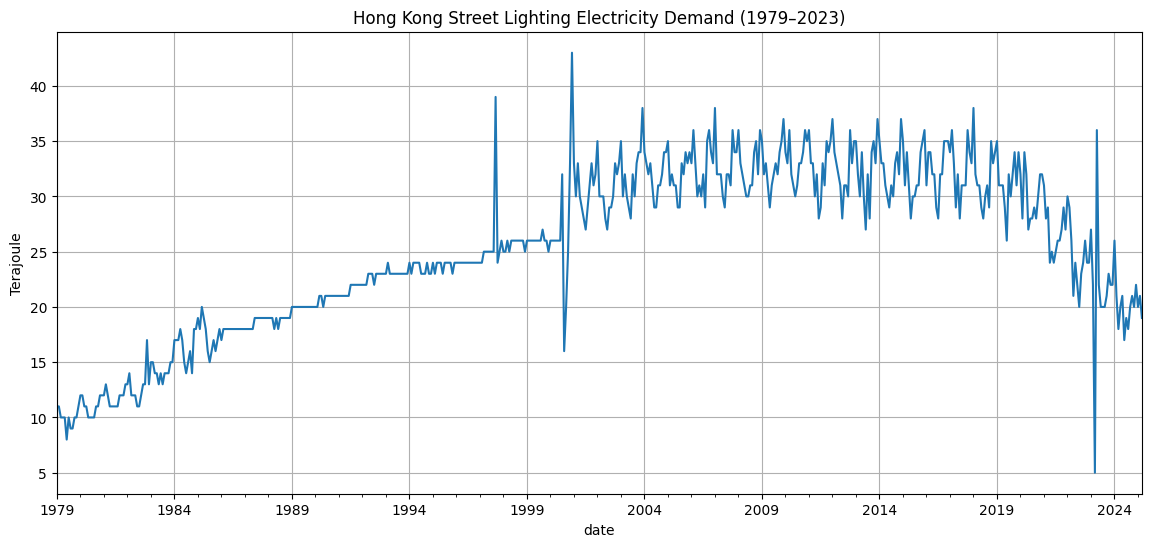

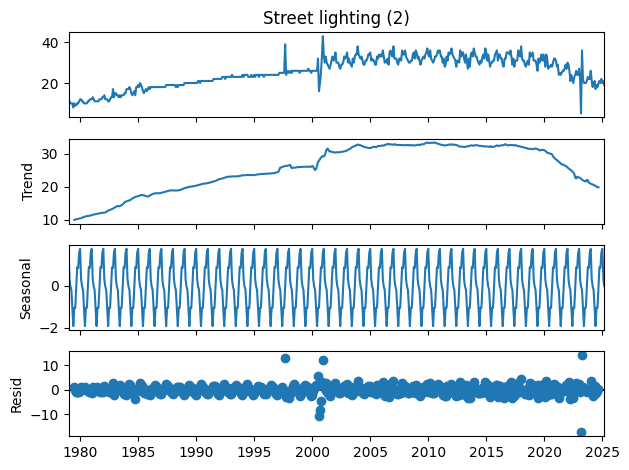

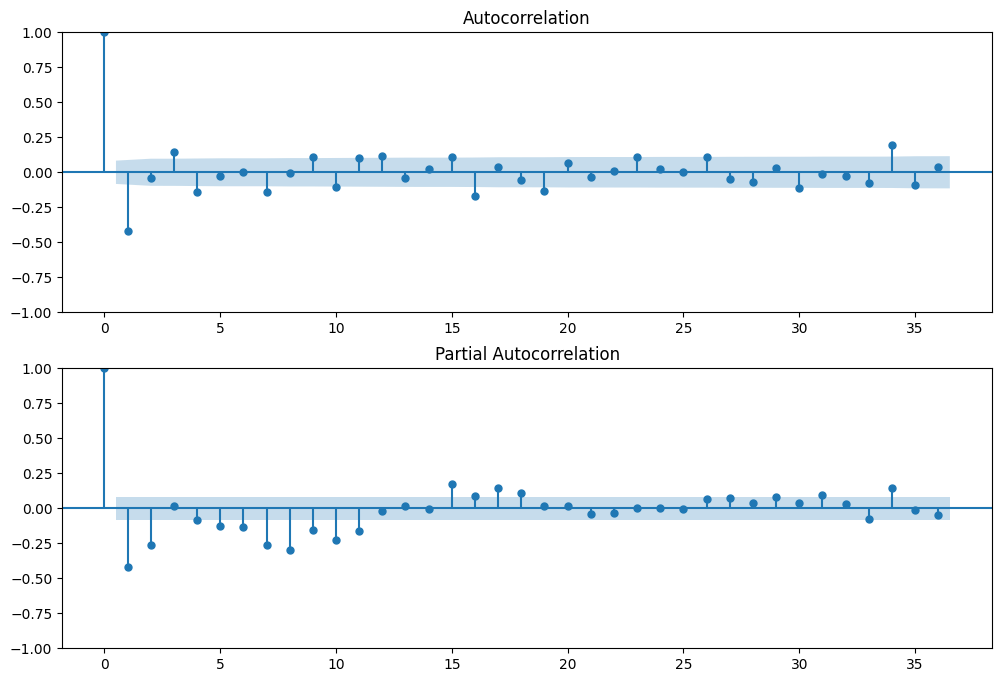

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                Street lighting (2)   No. Observations:                  555
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -1156.843
Date:                            Tue, 20 May 2025   AIC                           2323.685
Time:                                    13:54:00   BIC                           2345.031
Sample:                                01-01-1979   HQIC                          2332.041
                                     - 03-01-2025                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0139      0.021     -0.648      0.517      -0.056       0.028
ma.L1         -0.8660      0.019   

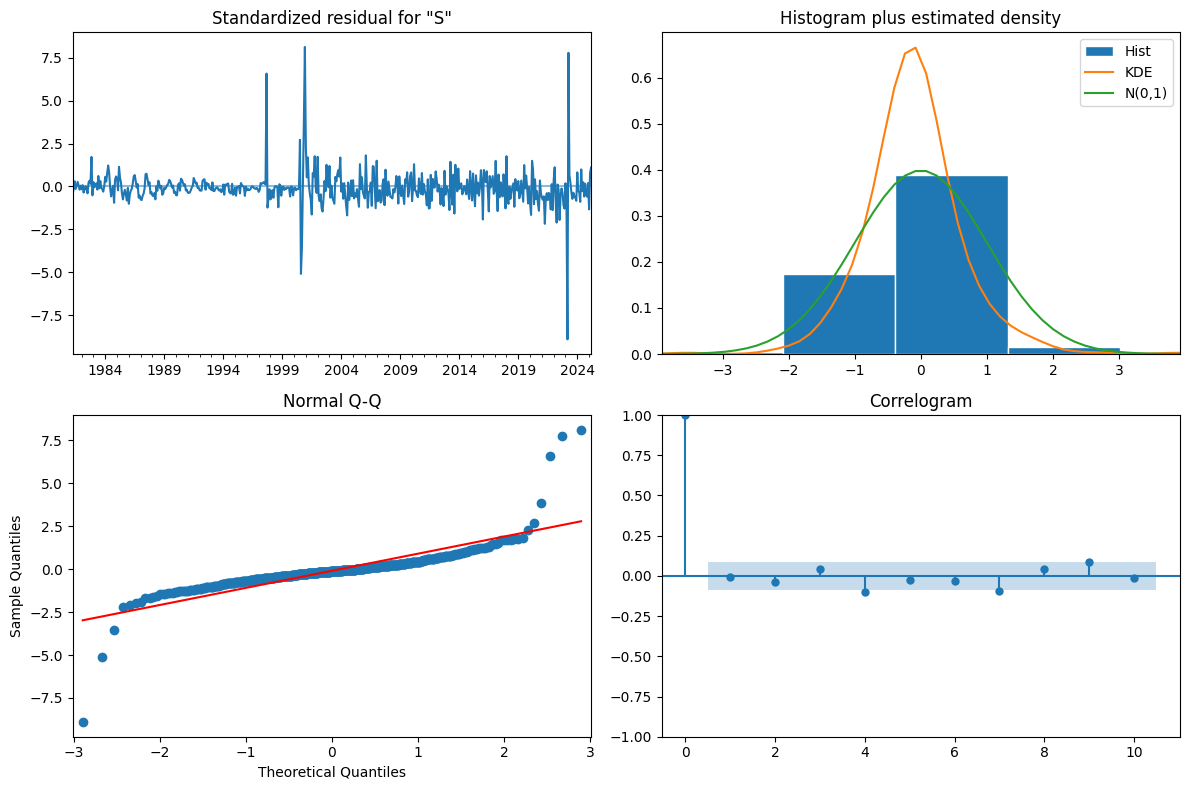

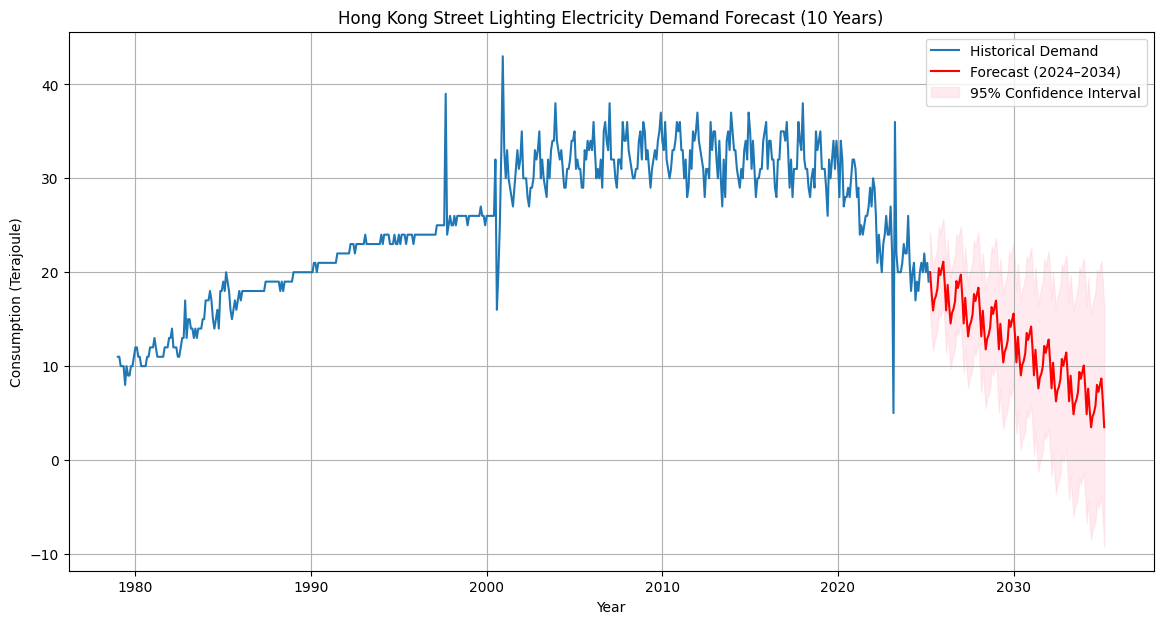

In [ ]:
# Estimation of street lights electricity demand

# Load data
df = pd.read_csv('electricity consumption.csv')
df['date'] = pd.to_datetime(df['Year'].astype(str) + '-' + df['Month'].astype(str))
df.set_index('date', inplace=True)
df.sort_index(inplace=True)

# Extract street lighting demand (same as industrial forecast method)
street_light_series = df['Street lighting (2)']

# Plot historical street lighting demand
plt.figure(figsize=(14, 6))
street_light_series.plot(title='Hong Kong Street Lighting Electricity Demand (1979–2023)', ylabel='Terajoule', grid=True)
plt.show()

# Seasonal decomposition (check trends & seasonality)
decomposition = seasonal_decompose(street_light_series, model='additive', period=12)
decomposition.plot()
plt.show()

# ACF & PACF plots (to confirm SARIMA parameters)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
plot_acf(street_light_series.diff().dropna(), lags=36, ax=ax1)
plot_pacf(street_light_series.diff().dropna(), lags=36, ax=ax2)
plt.show()

# SARIMA parameters (same as industrial forecast)
order = (1, 1, 1)           # (p, d, q) - Non-seasonal
seasonal_order = (1, 1, 1, 12)  # (P, D, Q, s) - Seasonal (12 months)

# Fit SARIMA model
model = SARIMAX(
    street_light_series,
    order=order,
    seasonal_order=seasonal_order,
    enforce_stationarity=False,
    enforce_invertibility=False
)
results = model.fit(disp=False)
print(results.summary())

# Model diagnostics (residuals, QQ-plot, etc.)
results.plot_diagnostics(figsize=(12, 8))
plt.tight_layout()
plt.show()

# Forecast next 10 years (120 months)
forecast_period = 120
forecast = results.get_forecast(steps=forecast_period)
forecast_values = forecast.predicted_mean
confidence_intervals = forecast.conf_int()

# Generate future dates
last_date = street_light_series.index[-1]
forecast_dates = pd.date_range(
    start=last_date + pd.DateOffset(months=1),
    periods=forecast_period,
    freq='MS'
)

# Plot forecast vs. historical data
plt.figure(figsize=(14, 7))
plt.plot(street_light_series.index, street_light_series, label='Historical Demand')
plt.plot(forecast_dates, forecast_values, color='red', label='Forecast (2024–2034)')
plt.fill_between(
    forecast_dates,
    confidence_intervals.iloc[:, 0],
    confidence_intervals.iloc[:, 1],
    color='pink',
    alpha=0.3,
    label='95% Confidence Interval'
)
plt.title('Hong Kong Street Lighting Electricity Demand Forecast (10 Years)')
plt.ylabel('Consumption (Terajoule)')
plt.xlabel('Year')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
end_time = time.time()
execution_time = end_time - start_time
print(f"Execution time for street light electricity demand: {execution_time:.4f} seconds")

Execution time for street light electricity demand: 4.7574 seconds
